We implement the most famous solutions to the differential equation $\frac{\partial f}{\partial t} + r S \frac{\partial f}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 f}{\partial S^2} = rf$ for the prices of European call and put options. These formulas are $c = S_0 N(d_1) - K e^{-r T} N(d_2)$ for the price of call and $p = Ke^{-rT} N(-d_2) - S_0 N(-d_1)$ for the price of put where 
$d_1 = \frac{\ln(S_0/K) + (r+\sigma^2/2)T}{\sigma \sqrt{T}}$ and $d_2 = \frac{\ln(S_0/K) + (r-\sigma^2/2)T}{\sigma \sqrt{T}} = d_1 - \sigma \sqrt{T}$

In [19]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [9]:
#BSM pricer for European option on non-dividend stock
def BlackScholesMerton(option_type, S0, K, r, sigma, T):
    d1 = (np.log(S0/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    if option_type == 'call':
        return S0 * ss.norm.cdf(d1) - K * np.exp(-r*T) * ss.norm.cdf(d2)
    elif option_type == 'put':
        return K * np.exp(-r*T) * ss.norm.cdf(-d2) - S0 * ss.norm.cdf(-d1)

In [10]:
#test the function on example 15.6
print('call price is ', BlackScholesMerton('call', 42, 40, 0.1, 0.2, 0.5))
print('put price is ', BlackScholesMerton('put', 42, 40, 0.1, 0.2, 0.5))

call price is  4.759422392871532
put price is  0.8085993729000922


In [11]:
#BSM pricer for European option on stock with dividend
def BlackScholesMerton_d(d, x1, x2, option_type, S0, K, r, sigma, T): #d is the dividend on each ex-dividend date and x1, x2 were ex-divident date in months
    d_present = d * np.exp(-r * x1 / 12) + d * np.exp(-r * x2 / 12)
    return BlackScholesMerton(option_type, S0 - d_present, K, r, sigma, T)


In [12]:
#test the function on example 15.9
BlackScholesMerton_d(0.5, 2, 5, 'call', 40, 40, 0.09, 0.3, 0.5)

3.671233209047678

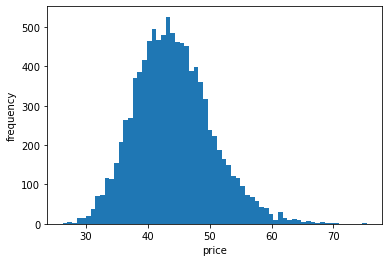

In [29]:
#try ex 15.6 with Monte Carlo approach with 1000 simulations
S0 = 42
K = 40
r = 0.1
sigma = 0.2
T = 0.5
N = 10000
Z = np.random.normal(size = N)
ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T)*Z)
plt.hist(ST, bins = 'auto')
plt.xlabel('price')
plt.ylabel('frequency'
          )
weeks = 52
dt = T/weeks
S = np.zeros((weeks+1, N))
S[0] = S0
for t in range(1, weeks + 1):
    Z = np.random.normal(size = N)
    S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt)*Z)


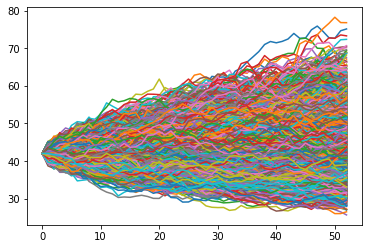

In [30]:
plt.plot(S)
plt.show()

In [36]:
payoff = np.max(np.mean(S[weeks]) - K, 0)
print(payoff * np.exp(-r*T))

3.9753641801206507
